In [41]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df = pd.read_csv('data/historical_data.csv')
df.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [42]:
# understanding the data landscape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [43]:
# looking for null values

df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [44]:
# need to create a new variable which is the actual delivery time
# in order for that to happen the data types for created_at and actual_delivery_time have to be changed from object to datetime

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['actual_delivery_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()
df.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,3779.0,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,4024.0,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,1781.0,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,3075.0,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2390.0,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [45]:
# since we are calculating for delivery there are a few variables we need to take into consideration
# how long was the drive to the restaurant? how long did the order take to get to the restautant?

# creating a variable to measure the amount of time these two actions took during the order
df['time_to_resto'] = df['estimated_store_to_consumer_driving_duration'] + df['estimated_order_place_duration']
df.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,time_to_resto
0,1.0,2015-02-06 22:24:17,3779.0,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,1307.0
1,2.0,2015-02-10 21:49:25,4024.0,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,1136.0
2,3.0,2015-01-22 20:39:28,1781.0,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1136.0
3,3.0,2015-02-03 21:21:45,3075.0,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,735.0
4,3.0,2015-02-15 02:40:36,2390.0,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,1096.0


In [46]:
# since we have the data for dashers on shift AND how many dashers were busy, understanding if dasher capacity plays is important
# creating a new column called dasher_ration which will have the percentage of dashers that were not busy during the time of the order

df['dasher_ratio'] = df['total_busy_dashers']/df['total_onshift_dashers']

In [47]:
# understanding the amount of unique market ids
df['market_id'].nunique()

6

In [48]:
# now let's look at the amount of unique store ids
df['store_id'].nunique()

6743

In [49]:
# number of unique models in which doordash can send an order
df['order_protocol'].nunique()

7

In [50]:
# creating a dictionary with the most repeated categories of each store to full null rows
id_unique = df['store_id'].unique().tolist()

# creating the dictionary
id_category = {store_id: df[df['store_id'] == store_id].store_primary_category.mode() for store_id in id_unique}

In [51]:
# creating a function that will label any null values that the store_ids in the dictionary may have
# some have more than one option, but we will be using the first value since it is the primary

def fill_id(store_id):
    try:
        return id_category[store_id].values[0]
    except:
        return np.nan
    

df['store_category_clean'] = df['store_id'].apply(fill_id)

In [52]:
df.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,time_to_resto,dasher_ratio,store_category_clean
0,1.0,2015-02-06 22:24:17,3779.0,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,1307.0,0.424242,american
1,2.0,2015-02-10 21:49:25,4024.0,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,1136.0,2.000000,indian
2,3.0,2015-01-22 20:39:28,1781.0,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1136.0,0.000000,indian
3,3.0,2015-02-03 21:21:45,3075.0,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,735.0,1.000000,indian
4,3.0,2015-02-15 02:40:36,2390.0,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,1096.0,1.000000,indian
5,3.0,2015-01-28 20:30:38,2300.0,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0,784.0,1.000000,indian
6,3.0,2015-01-31 02:16:36,1584.0,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0,1084.0,0.900000,indian
7,3.0,2015-02-12 03:03:35,1965.0,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0,1072.0,1.142857,indian
8,2.0,2015-02-16 00:11:35,1586.0,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,735.0,0.750000,indian
9,3.0,2015-02-18 01:15:45,3192.0,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0,1161.0,1.000000,indian


In [53]:
# creating dummies for the order protocol

protocol_dummies = pd.get_dummies(df['order_protocol'])
protocol_dummies = protocol_dummies.add_prefix('order_protocol_')
protocol_dummies.head(5)

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [54]:
# now creating dummies for the market_id

market_dummies = pd.get_dummies(df['market_id'])
market_dummies = market_dummies.add_prefix('market_id_')
market_dummies.head(5)

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [55]:
# creating dummies for primary category

store_dummies = pd.get_dummies(df['store_category_clean'])
store_dummies = store_dummies.add_prefix('category_')
store_dummies.head(5)

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
train_df = df.drop(columns = ['created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time', 
                              'store_category_clean', 'order_protocol'])

train_df.head(5)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,time_to_resto,dasher_ratio
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,1307.0,0.424242
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,1136.0,2.000000
2,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1136.0,0.000000
3,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,735.0,1.000000
4,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,1096.0,1.000000


In [57]:
# merging dummy tables to train_df
train_df = pd.concat([train_df, protocol_dummies, market_dummies, store_dummies], axis = 1)

# aligning datatype over the dataset
train_df = train_df.astype("float32")
train_df.head(10)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,5000.0,3.0,1500.0,1900.0,2.0,2.0,2.0,446.0,338.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.0,3900.0,2.0,1200.0,2700.0,10.0,9.0,9.0,446.0,638.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.0,4850.0,4.0,750.0,1800.0,7.0,8.0,7.0,446.0,626.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,4771.0,3.0,820.0,1604.0,8.0,6.0,18.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,2100.0,2.0,700.0,1200.0,2.0,2.0,2.0,446.0,715.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# understanding the data landscape

train_df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,3.196391,2682.242188,2.670791,686.189941,1159.415405,44.808094,41.739746,58.050064,309.313446,545.358765,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,2.665833,1822.968994,1.629398,522.068542,558.358337,34.524193,32.146065,52.657368,90.211159,219.350143,...,0.028535,0.013687,0.073625,0.105705,0.027175,0.189502,0.034246,0.037816,0.064904,0.173167
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# looking at dasher_ratio specifically
# need to check infinity values using numpy isfinite()

train_df['dasher_ratio'].describe()

count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: dasher_ratio, dtype: float64

In [60]:
# check infinity values using numpy isfinite()

np.where(np.any(~np.isfinite(train_df), axis = 0) == True)

(array([ 5,  6,  7,  9, 10, 11], dtype=int64),)

In [61]:
# need to replace inf values with nan to drop the nans or null values
train_df.replace([np.inf, -np.inf], np.nan, inplace = True)

# dropping the nans 
train_df.dropna(inplace = True)
train_df.shape

(177077, 99)

In [62]:
# confirming there are no more nans
train_df.isnull().sum().sum()

0

#### Removing Redundant and Collinear Features

+ Need to identify the most important features
+ Currently there are 99, but not all of these features will be useful

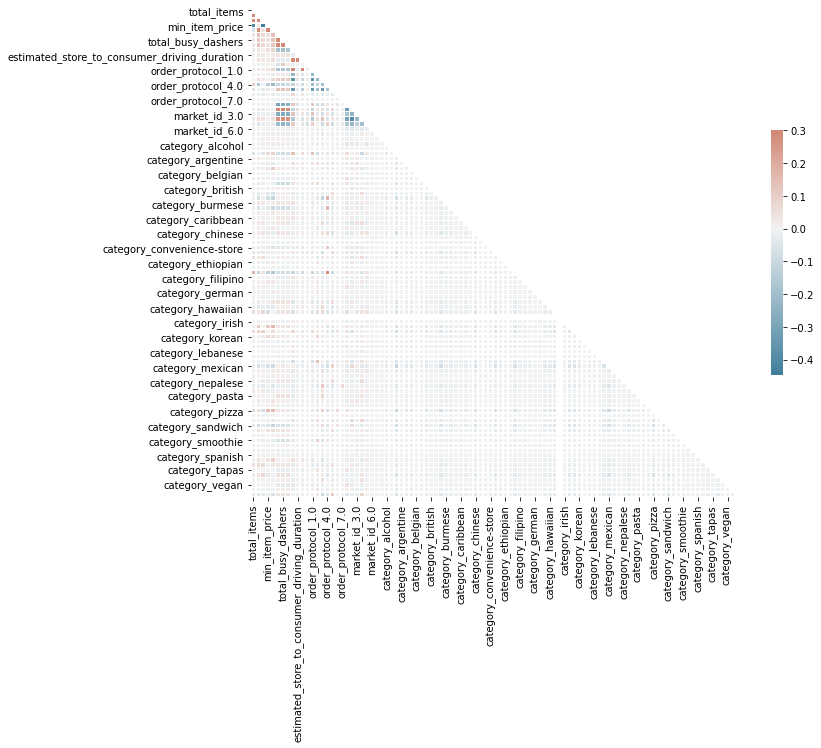

In [63]:
# generating a masks for the upper triangle
# creating a visualization to illustrate the correlations

corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5});

#### Observations

+ Right away, category_indonesian sticks out
+ It looks as if it has a zero standard deviation, which won't add any knowledge to the model
+ To confirm, call the indonesian category and use describe() to confirm the deviation is 0

In [64]:
# pulling up the indonesian category

train_df['category_indonesian'].describe()

count    177077.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: category_indonesian, dtype: float64

###  Creating functions to perform the following:

+ Find the redundant pairs to drop them from the dataset
+ Find the top correlated features that will have an impact on the model

In [65]:
def get_redundant_pairs(df):
    # get diagonal and lower triangular pairs of correlation matrix 
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    # sort correlations in the descending order and return n highest results
    au_corr = df.corr().abs().unstack()   # getting the correlation numbers, getting the absolute numeric value for each specific correlation column
    labels_to_drop = get_redundant_pairs(df)  # labelling the columns to drop
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False) # dropping columns labelled, sorting the correlation % descending
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
total_onshift_dashers                         total_busy_dashers          0.941744
                                              total_outstanding_orders    0.934642
total_busy_dashers                            total_outstanding_orders    0.931295
estimated_store_to_consumer_driving_duration  time_to_resto               0.923087
estimated_order_place_duration                order_protocol_1.0          0.897649
total_items                                   num_distinct_items          0.758153
subtotal                                      num_distinct_items          0.682892
total_items                                   subtotal                    0.557181
min_item_price                                max_item_price              0.541239
subtotal                                      max_item_price              0.507949
order_protocol_4.0                            category_fast               0.489986
num_distinct_items                            min_item_price 

In [70]:
# need to drop created_at, market_id, store_id, store_primary_category, actual_delivery_time, order_protocol
train_df = df.drop(columns = ['created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time', 'store_category_clean', 'order_protocol'])

# merging protocol dummies and store dummies to train_df
train_df = pd.concat([train_df, protocol_dummies, store_dummies], axis = 1)

# dropping highly correlated features
train_df = train_df.drop(columns = ['total_onshift_dashers', 'total_busy_dashers', 'category_indonesian', 'time_to_resto'])

# aligning the datatype over the dataset
train_df = train_df.astype("float32")

# replace inf values with nan to drop all nans
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,dasher_ratio,order_protocol_1.0,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,0.424242,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,2.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# understanding numbers of rows and columns after the few changes to the dataset
train_df.shape

(177077, 89)

In [72]:
# now let's look at the 

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
estimated_order_place_duration  order_protocol_1.0    0.897649
total_items                     num_distinct_items    0.758153
subtotal                        num_distinct_items    0.682892
total_items                     subtotal              0.557181
min_item_price                  max_item_price        0.541239
subtotal                        max_item_price        0.507949
order_protocol_4.0              category_fast         0.489986
num_distinct_items              min_item_price        0.446735
total_items                     min_item_price        0.389280
order_protocol_1.0              order_protocol_3.0    0.373582
estimated_order_place_duration  order_protocol_3.0    0.364171
order_protocol_1.0              order_protocol_5.0    0.342341
estimated_order_place_duration  order_protocol_5.0    0.333288
order_protocol_3.0              order_protocol_5.0    0.332530
order_protocol_1.0              order_protocol_2.0    0.226904
estimated_order_place_duratio

In [73]:
# need to drop created_at, market_id, store_id, store_primary_category, actual_delivery_time, order_protocol
train_df = df.drop(columns = ['created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time', 'store_category_clean', 'order_protocol'])

# merging protocol dummies and store dummies to train_df
train_df = pd.concat([train_df, store_dummies], axis = 1)

# dropping highly correlated features
train_df = train_df.drop(columns = ['total_onshift_dashers', 'total_busy_dashers', 'category_indonesian', 'time_to_resto'])

# aligning the datatype over the dataset
train_df = train_df.astype("float32")

# replace inf values with nan to drop all nans
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,dasher_ratio,category_afghan,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,0.424242,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,2.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
train_df.shape

(177077, 82)

In [75]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
total_items                     num_distinct_items                0.758153
subtotal                        num_distinct_items                0.682892
total_items                     subtotal                          0.557181
min_item_price                  max_item_price                    0.541239
subtotal                        max_item_price                    0.507949
num_distinct_items              min_item_price                    0.446735
total_items                     min_item_price                    0.389280
total_outstanding_orders        estimated_order_place_duration    0.171010
total_items                     category_fast                     0.170968
max_item_price                  category_italian                  0.169774
                                category_fast                     0.166186
                                category_pizza                    0.157573
estimated_order_place_duration  category_american                 0.150171

#### There are still features with high correlations

+ The total number of distinct items could affect the duration of the preparation process
+ Therefore, we do not want to drop it
+ We can perform feature engineering to understand the contribution of these columns

In [76]:
# creating a new feature outlining the % of distinct items in each order
train_df['perc_distinct_items'] = train_df['num_distinct_items'] / train_df['total_items']

# creating another feature which gives us the average price per item
train_df['avg_price_per_item'] = train_df['subtotal'] / train_df['total_items']

# now we can drop the distinct items columns and the subtotals
train_df.drop(columns = ['num_distinct_items', 'subtotal'], inplace = True)

# printing out correlation statement
print('Top Absolute Correlations')
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
min_item_price                  avg_price_per_item                0.860581
max_item_price                  avg_price_per_item                0.770380
min_item_price                  max_item_price                    0.541239
total_items                     perc_distinct_items               0.445763
                                min_item_price                    0.389280
                                avg_price_per_item                0.310765
perc_distinct_items             avg_price_per_item                0.226718
category_pizza                  avg_price_per_item                0.225507
max_item_price                  perc_distinct_items               0.178017
category_fast                   avg_price_per_item                0.175971
min_item_price                  perc_distinct_items               0.173534
total_outstanding_orders        estimated_order_place_duration    0.171010
total_items                     category_fast                     0.170968